<a href="https://colab.research.google.com/github/Shirinii/Drug-Classification/blob/main/Project6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification of drug types based on the patients characterictics

Author : Shirin Rezaei

StudentID : 

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline
import seaborn as sns; sns.set() # Data visualization
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
from scipy.stats import beta
from scipy.stats import f
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import os as os

Read cvs file into dataframe

In [51]:
url = "https://raw.githubusercontent.com/Shirinii/Drug-Classification/main/drug200.csv?token=GHSAT0AAAAAAB3VO2VUJSGUL4XPPPLXCQ22Y4CQRZA"
drug_data = pd.read_csv(url)
print(drug_data.head())


   Age Sex      BP Cholesterol  Potassium_Ration   Drug
0   23   F    HIGH        HIGH            25.355  drugY
1   47   M     LOW        HIGH            13.093  drugC
2   47   M     LOW        HIGH            10.114  drugC
3   28   F  NORMAL        HIGH             7.798  drugX
4   61   F     LOW        HIGH            18.043  drugY


Data Exploration

In [52]:
#size of data
m,n=drug_data.shape 
print([m,n])

[200, 6]


Identify Missing Values


In [53]:
nan_columns=drug_data.isnull().sum()
print(nan_columns)
#which rows have null value
nan_rows=drug_data[drug_data.isnull().any(1)]
print(nan_rows)

Age                 0
Sex                 0
BP                  0
Cholesterol         0
Potassium_Ration    0
Drug                0
dtype: int64
Empty DataFrame
Columns: [Age, Sex, BP, Cholesterol, Potassium_Ration, Drug]
Index: []


There is no data with missing value.

Different drug type classes in the data



In [54]:
#Drug Y (drugY)
#Drug C (drugC)
#Drug X (drugX)
#Drug A (drugA)
#Drug B (drugB)
print('drug type classes:', drug_data['Drug'].unique())

drug type classes: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


Using LabelEncoder to transform categorical variables into continuous variables



In [55]:
df = drug_data.copy()
label = LabelEncoder()
label.fit(df.Sex.drop_duplicates())
df.Sex = label.transform(df.Sex)
label.fit(df.BP.drop_duplicates())
df.BP = label.transform(df.BP)
label.fit(df.Cholesterol.drop_duplicates())
df.Cholesterol = label.transform(df.Cholesterol)
Y = df['Drug']
print(df.head())

   Age  Sex  BP  Cholesterol  Potassium_Ration   Drug
0   23    0   0            0            25.355  drugY
1   47    1   1            0            13.093  drugC
2   47    1   1            0            10.114  drugC
3   28    0   2            0             7.798  drugX
4   61    0   1            0            18.043  drugY


Summary of the data


In [56]:
df.describe()


,Age,Sex,BP,Cholesterol,Potassium_Ration
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,1.000000,1.000000,0.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


Count Plot


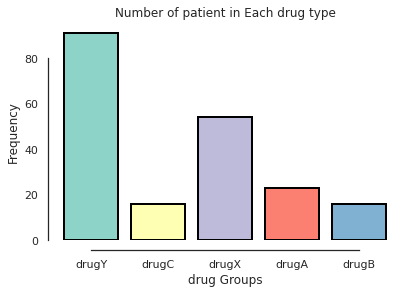

In [58]:
#visualisation of the data using a count plot
sns.set_style("white")
countplot = sns.countplot(x = "Drug",  data = df, palette='Set3', order=['drugY','drugC','drugX', 'drugA' ,'drugB'],saturation=1,linewidth=2,edgecolor=(0,0,0))
countplot.set(xlabel = "drug Groups", ylabel = "Frequency", title = "Number of patient in Each drug type")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.despine(offset=10, trim=True)